# DOG BREED CLASSIFICATION USING AWS SAGEMAKER

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [ ]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.1/270.1 kB 4.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 kB 1.5 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

In [3]:
from sagemaker.pytorch import PyTorch

In [39]:
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 31.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 962.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 13.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 39.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 979.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 11.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 33.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [9]:
!pip install tensorboard

Keyring is skipped due to an exception: 'keyring.backends'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 37.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 2.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 37.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 13.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 1.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 5.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 3.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: werkzeug
    Found existing installation: W

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

Using Dog breed classification dataset. Train, Test, valudation data were already separated and each has images of 133 dog breeds like Affenpinscher, Aghan_hound,Airedale_terrier,golden_retriever etc


In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2023-02-22 03:01:38--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.96
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  28.7MB/s    in 34s     

2023-02-22 03:02:14 (32.2 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Af

In [9]:
from sagemaker import get_execution_role

# Get the SageMaker execution role
role = get_execution_role()
print("RoleArn: {}".format(role))

# Get the default S3 bucket name
session = boto3.session.Session()
s3_client = session.client('s3')
s3_bucket_name = s3_client.list_buckets()['Buckets'][1]['Name']
print("Default Bucket: {}".format(s3_bucket_name))

# Get the AWS region
region_name = session.region_name
print("AWS Region: {}".format(region_name))

RoleArn: arn:aws:iam::414210217763:role/service-role/AmazonSageMaker-ExecutionRole-20230102T154202
Default Bucket: sagemaker-studio-414210217763-ngoae9vwgi8
AWS Region: us-east-1


In [10]:
import os

os.environ["DEFAULT_S3_BUCKET"] = s3_bucket_name
!aws s3 sync ./dogImages/train s3://${DEFAULT_S3_BUCKET}/dogImages/train/
!aws s3 sync ./dogImages/test s3://${DEFAULT_S3_BUCKET}/dogImages/test/
!aws s3 sync ./dogImages/valid s3://${DEFAULT_S3_BUCKET}/dogImages/valid/

upload: dogImages/train/001.Affenpinscher/Affenpinscher_00002.jpg to s3://sagemaker-studio-414210217763-ngoae9vwgi8/dogImages/train/001.Affenpinscher/Affenpinscher_00002.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00006.jpg to s3://sagemaker-studio-414210217763-ngoae9vwgi8/dogImages/train/001.Affenpinscher/Affenpinscher_00006.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00005.jpg to s3://sagemaker-studio-414210217763-ngoae9vwgi8/dogImages/train/001.Affenpinscher/Affenpinscher_00005.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg to s3://sagemaker-studio-414210217763-ngoae9vwgi8/dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00007.jpg to s3://sagemaker-studio-414210217763-ngoae9vwgi8/dogImages/train/001.Affenpinscher/Affenpinscher_00007.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00018.jpg to s3://sagemaker-studio-414210217763-ngoae9vwgi8/dogImages/trai

In [13]:
s3_bucket_name

'sagemaker-studio-3iv53pbqhfp'

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [7]:
#TODO: Declare your HP ranges, metrics etc.
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)


hyperparameter_ranges = {
    "learning_rate": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([32, 64, 128, 256, 512]),
    "num_epochs": IntegerParameter(2, 4)
} 



objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [7]:
#TODO: Create estimators for your HPs

estimator = PyTorch(
    entry_point="hpo1.py",
    base_job_name="sagemaker-hpo",
    role=get_execution_role(),
    instance_count=1,
    instance_type="ml.m5.large",
    framework_version="1.8",
    py_version="py36",
)# TODO: Your estimator here

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=4,
    objective_type=objective_type,
)# TODO: Your HP tuner here

In [11]:
dataset_dir_path = "s3://sagemaker-studio-414210217763-ngoae9vwgi8/dogImages/"

In [25]:
# TODO: Fit your HP Tuner
tuner.fit({'data': dataset_dir_path}, wait=True) # TODO: Remember to include your data channels

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [26]:
# TODO: Get the best estimators and the best HPs
best_training_job = tuner.best_training_job()
print("Best training job is {}".format(best_training_job))
best_estimator = tuner.best_estimator() #TODO
print("Best estimator is {}".format(best_estimator))
#Get the hyperparameters of the best trained model
best_hyperparameters=best_estimator.hyperparameters()
print("Hyperparameters of Best estimator is {}".format(best_hyperparameters))

Best training job is pytorch-training-230221-1958-003-5f7ac81b

2023-02-21 22:09:38 Starting - Preparing the instances for training
2023-02-21 22:09:38 Downloading - Downloading input data
2023-02-21 22:09:38 Training - Training image download completed. Training in progress.
2023-02-21 22:09:38 Uploading - Uploading generated training model
2023-02-21 22:09:38 Completed - Resource released due to keep alive period expiry
Best estimator is <sagemaker.pytorch.estimator.PyTorch object at 0x7f6534d4dc90>
Hyperparameters of Best estimator is {'_tuning_objective_metric': '"average test loss"', 'batch_size': '"256"', 'learning_rate': '0.0020610662962159635', 'num_epochs': '4', 'sagemaker_container_log_level': '20', 'sagemaker_estimator_class_name': '"PyTorch"', 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"', 'sagemaker_job_name': '"sagemaker-hpo-2023-02-21-19-58-28-810"', 'sagemaker_program': '"hpo1.py"', 'sagemaker_region': '"us-east-1"', 'sagemaker_submit_directory': '"s3://

In [8]:
#reloading the hyperparameter tuning job
tuner = HyperparameterTuner.attach("pytorch-training-230221-1958")

In [9]:
best_training_job = tuner.best_training_job()
print("Best training job is {}".format(best_training_job))
best_estimator = tuner.best_estimator() #TODO
print("Best estimator is {}".format(best_estimator))
#Get the hyperparameters of the best trained model
best_hyperparameters=best_estimator.hyperparameters()
print("Hyperparameters of Best estimator is {}".format(best_hyperparameters))

Best training job is pytorch-training-230221-1958-003-5f7ac81b

2023-02-21 22:09:38 Starting - Preparing the instances for training
2023-02-21 22:09:38 Downloading - Downloading input data
2023-02-21 22:09:38 Training - Training image download completed. Training in progress.
2023-02-21 22:09:38 Uploading - Uploading generated training model
2023-02-21 22:09:38 Completed - Resource released due to keep alive period expiry
Best estimator is <sagemaker.pytorch.estimator.PyTorch object at 0x7f6317669590>
Hyperparameters of Best estimator is {'_tuning_objective_metric': '"average test loss"', 'batch_size': '"256"', 'learning_rate': '0.0020610662962159635', 'num_epochs': '4', 'sagemaker_container_log_level': '20', 'sagemaker_estimator_class_name': '"PyTorch"', 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"', 'sagemaker_job_name': '"sagemaker-hpo-2023-02-21-19-58-28-810"', 'sagemaker_program': '"hpo1.py"', 'sagemaker_region': '"us-east-1"', 'sagemaker_submit_directory': '"s3://

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [12]:
# Creating the hyperparameters dictionary using best hyperparameters
hyperparameters = {
    "learning_rate": 0.0020610662962159635,
    "batch_size": 256,
    "num_epochs": 4,
    }

print(hyperparameters)

{'learning_rate': 0.0020610662962159635, 'batch_size': 256, 'num_epochs': 4}


In [15]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import (
    Rule,
    ProfilerRule,
    DebuggerHookConfig,
    rule_configs,
)
from sagemaker.debugger import Rule, ProfilerRule, rule_configs, ProfilerConfig, CollectionConfig, FrameworkProfile

rules = [
    #Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]



profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)

collection_configs=[
    CollectionConfig(
        name="weights",
        parameters={
            "train.save_interval": "5",
            "eval.save_interval": "1"
        }
    ),
    CollectionConfig(
        name="gradients",
        parameters={
            "train.save_interval": "5",
            "eval.save_interval": "1"
        }
    ),
    CollectionConfig(
        name="biases",
        parameters={
            "train.save_interval": "5",
            "eval.save_interval": "1"
        }
    ),
    CollectionConfig(
        name="CrossEntopyLoss_output_0", 
        parameters={
            "include_regex": "CrossEntropyLoss_output_0",
            "train.save_interval": "1",
            "eval.save_interval": "1"
        }
    )
]

hook_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "5", "eval.save_interval": "1"},
    collection_configs=collection_configs
    
)

In [18]:
# TODO: Create and fit an estimator

estimator = PyTorch(
    entry_point="train_model_1.py",
    base_job_name="smdebugger-dog-breed",
    role=get_execution_role(),
    instance_count=1,
    instance_type="ml.c5.2xlarge",
    hyperparameters=hyperparameters,
    framework_version="1.8",
    py_version="py36",
    ## Debugger parameters
    rules=rules,
    debugger_hook_config=hook_config,
    profiler_config=profiler_config,
)# TODO: Your estimator here

In [19]:
estimator.fit({'data': dataset_dir_path}, wait=True)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: smdebugger-dog-breed-2023-02-22-03-38-33-567


2023-02-22 03:38:34 Starting - Starting the training job...
2023-02-22 03:39:01 Starting - Preparing the instances for trainingOverfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LossNotDecreasing: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
......
2023-02-22 03:39:56 Downloading - Downloading input data......
2023-02-22 03:40:57 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-02-22 03:41:00,356 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-02-22 03:41:00,359 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-02-22 03:41:00,366 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-02-22 03:41:00,368 sagemaker_pytorch_container.training INFO     Invoking user training script

In [ ]:
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

print(description)

{'TrainingJobName': 'smdebugger-dog-breed-2023-02-22-03-38-33-567', 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:414210217763:training-job/smdebugger-dog-breed-2023-02-22-03-38-33-567', 'ModelArtifacts': {'S3ModelArtifacts': 's3://sagemaker-us-east-1-414210217763/smdebugger-dog-breed-2023-02-22-03-38-33-567/output/model.tar.gz'}, 'TrainingJobStatus': 'Completed', 'SecondaryStatus': 'Completed', 'HyperParameters': {'batch_size': '256', 'learning_rate': '0.0020610662962159635', 'num_epochs': '4', 'sagemaker_container_log_level': '20', 'sagemaker_job_name': '"smdebugger-dog-breed-2023-02-22-03-38-33-567"', 'sagemaker_program': '"train_model_1.py"', 'sagemaker_region': '"us-east-1"', 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-414210217763/smdebugger-dog-breed-2023-02-22-03-38-33-567/source/sourcedir.tar.gz"'}, 'AlgorithmSpecification': {'TrainingImage': '763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:1.8-cpu-py36', 'TrainingInputMode': 'File', 'EnableSageMake

In [30]:
from sagemaker.pytorch import PyTorch
estimator = PyTorch.attach("smdebugger-dog-breed-2023-02-22-03-38-33-567")


2023-02-22 04:24:49 Starting - Preparing the instances for training
2023-02-22 04:24:49 Downloading - Downloading input data
2023-02-22 04:24:49 Training - Training image download completed. Training in progress.
2023-02-22 04:24:49 Uploading - Uploading generated training model
2023-02-22 04:24:49 Completed - Training job completed


In [31]:
import boto3

session = boto3.session.Session()
region = session.region_name

training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")

Training jobname: smdebugger-dog-breed-2023-02-22-03-38-33-567
Region: us-east-1


In [33]:
#import smdebug.pytorch as smd
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

In [87]:
trial.tensor_names()

['CrossEntropyLoss_output_0',
 'ResNet_bn1.bias',
 'ResNet_bn1.weight',
 'ResNet_conv1.weight',
 'ResNet_fc.bias',
 'ResNet_fc.weight',
 'ResNet_layer1.0.bn1.bias',
 'ResNet_layer1.0.bn1.weight',
 'ResNet_layer1.0.bn2.bias',
 'ResNet_layer1.0.bn2.weight',
 'ResNet_layer1.0.bn3.bias',
 'ResNet_layer1.0.bn3.weight',
 'ResNet_layer1.0.conv1.weight',
 'ResNet_layer1.0.conv2.weight',
 'ResNet_layer1.0.conv3.weight',
 'ResNet_layer1.0.downsample.0.weight',
 'ResNet_layer1.0.downsample.1.bias',
 'ResNet_layer1.0.downsample.1.weight',
 'ResNet_layer1.1.bn1.bias',
 'ResNet_layer1.1.bn1.weight',
 'ResNet_layer1.1.bn2.bias',
 'ResNet_layer1.1.bn2.weight',
 'ResNet_layer1.1.bn3.bias',
 'ResNet_layer1.1.bn3.weight',
 'ResNet_layer1.1.conv1.weight',
 'ResNet_layer1.1.conv2.weight',
 'ResNet_layer1.1.conv3.weight',
 'ResNet_layer1.2.bn1.bias',
 'ResNet_layer1.2.bn1.weight',
 'ResNet_layer1.2.bn2.bias',
 'ResNet_layer1.2.bn2.weight',
 'ResNet_layer1.2.bn3.bias',
 'ResNet_layer1.2.bn3.weight',
 'ResNet

In [88]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN))

81

In [90]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL))

4

In [91]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [92]:
# TODO: Plot a debugging output.
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


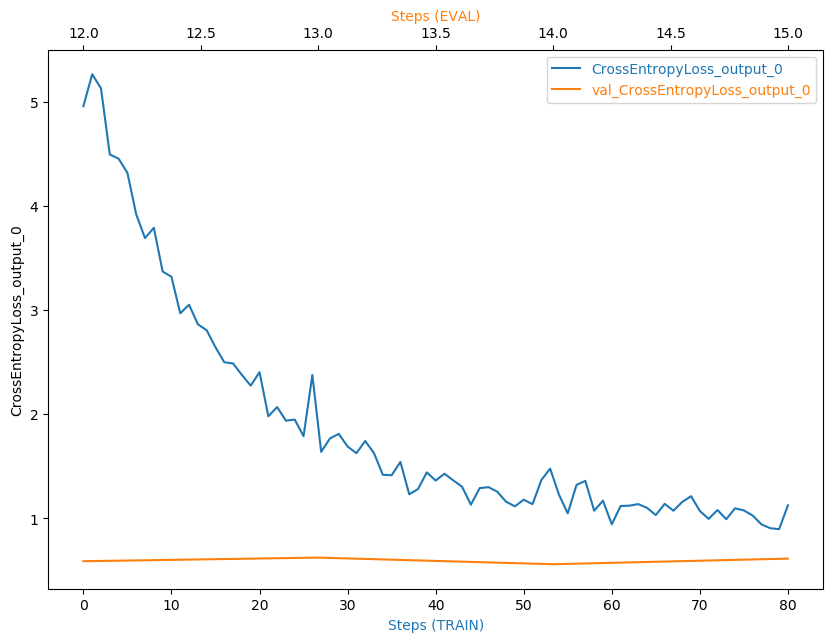

In [93]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

1)"PoorWeightInitialization: Error" has been observed in logs. This can be fixed by using weight intialization techniques like Xavier/Glorot Initialization, He Initialization, Uniform Initialization etc.,    
2)From the output it can be seen that training loss decreases with increase in steps whereas validation loss is almost constant and very low compared with training loss. This could be sign of overfitting. We can use regularization techniques to avoid this.  

In [95]:
pip install jinja2==3.0.3 --force-reinstall 

Keyring is skipped due to an exception: 'keyring.backends'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 2.5 MB/s eta 0:00:0000:01
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob

tj = TrainingJob(training_job_name, region)
tj.wait_for_sys_profiling_data_to_be_available()

ProfilerConfig:{'S3OutputPath': 's3://sagemaker-us-east-1-613276931990/', 'ProfilingIntervalInMilliseconds': 500, 'ProfilingParameters': {'DataloaderProfilingConfig': '{"StartStep": 0, "NumSteps": 10, "MetricsRegex": ".*", }', 'DetailedProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }', 'FileOpenFailThreshold': '50', 'HorovodProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }', 'LocalPath': '/opt/ml/output/profiler', 'PythonProfilingConfig': '{"StartStep": 0, "NumSteps": 10, "ProfilerName": "cprofile", "cProfileTimer": "total_time", }', 'RotateFileCloseIntervalInSeconds': '60', 'RotateMaxFileSizeInBytes': '10485760', 'SMDataParallelProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }'}, 'DisableProfiler': False}
s3 path:s3://sagemaker-us-east-1-613276931990/smdebugger-dog-breed-2023-02-21-02-32-30-147/profiler-output


Profiler data from system is available


In [9]:
from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts

system_metrics_reader = tj.get_systems_metrics_reader()
system_metrics_reader.refresh_event_file_list()

view_timeline_charts = TimelineCharts(
    system_metrics_reader,
    framework_metrics_reader=None,
    select_dimensions=["CPU", "GPU"],
    select_events=["total"],
)

[2023-02-21 03:51:08.273 datascience-1-0-ml-t3-xlarge-f8643c87c14951775a35723f6fbd:1564 INFO metrics_reader_base.py:134] Getting 38 event files
select events:['total']
select dimensions:['CPU', 'GPU']
filtered_events:{'total'}
filtered_dimensions:{'CPUUtilization-nodeid:algo-1'}


In [10]:
# TODO: Display the profiler output
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

You will find the profiler report in s3://sagemaker-us-east-1-613276931990/smdebugger-dog-breed-2023-02-21-02-32-30-147/rule-output


In [11]:
! aws s3 ls {rule_output_path} --recursive

2023-02-21 03:10:20     364966 smdebugger-dog-breed-2023-02-21-02-32-30-147/rule-output/ProfilerReport/profiler-output/profiler-report.html
2023-02-21 03:10:20     212022 smdebugger-dog-breed-2023-02-21-02-32-30-147/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2023-02-21 03:10:15        192 smdebugger-dog-breed-2023-02-21-02-32-30-147/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2023-02-21 03:10:15        200 smdebugger-dog-breed-2023-02-21-02-32-30-147/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2023-02-21 03:10:15       2072 smdebugger-dog-breed-2023-02-21-02-32-30-147/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2023-02-21 03:10:15        127 smdebugger-dog-breed-2023-02-21-02-32-30-147/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2023-02-21 03:10:15        199 smdebugger-dog-breed-2023-02-21-02-32-30-147/rule-output/ProfilerReport

In [12]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-613276931990/smdebugger-dog-breed-2023-02-21-02-32-30-147/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json to ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
download: s3://sagemaker-us-east-1-613276931990/smdebugger-dog-breed-2023-02-21-02-32-30-147/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-613276931990/smdebugger-dog-breed-2023-02-21-02-32-30-147/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-613276931990/smdebugger-dog-breed-2023-02-21-02-32-30-147/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb to ProfilerReport/profiler-output/profiler-report.ipynb
download: s3://sagemaker-us-east-1-613276931990/smdebugger-dog-bre

In [13]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [21]:
#this output is overlapping previous output
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")


## Model Deploying

We are tring to predict images of dogs that belong to two breeds. The response gives the probability distributions, so using argmax to predict index of label that has highest probability.

In [47]:
from sagemaker.pytorch import PyTorchModel

role = sagemaker.get_execution_role()

model_path = 's3://sagemaker-us-east-1-414210217763/smdebugger-dog-breed-2023-02-22-03-38-33-567/output/model.tar.gz'
entry_point = 'inference.py'
pytorch_model = PyTorchModel(
    model_data=model_path, 
    role=role, 
    entry_point=entry_point,
    framework_version="1.8",
    py_version="py36"
)

In [48]:
# TODO: Deploy your model to an endpoint
predictor=pytorch_model.deploy(
    initial_instance_count=1, instance_type="ml.t2.medium"
) # TODO: Add your deployment configuration like instance type and number of instances

INFO:sagemaker:Creating model with name: pytorch-inference-2023-02-22-05-36-23-808
INFO:sagemaker:Creating endpoint-config with name pytorch-inference-2023-02-22-05-36-24-465
INFO:sagemaker:Creating endpoint with name pytorch-inference-2023-02-22-05-36-24-465


-----------!

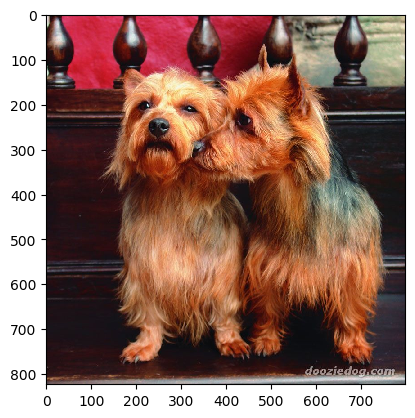

In [54]:
import matplotlib.pyplot as plt
image = plt.imread("dogImages/test/013.Australian_terrier/Australian_terrier_00923.jpg")
plt.imshow(image)
plt.show()

In [55]:
import requests
from PIL import Image
import io
import torchvision.transforms as T

path = ("dogImages/test/013.Australian_terrier/Australian_terrier_00923.jpg")
pil_img = Image.open(path)

# transforms
preprocess = T.Compose([
   T.Resize(256),
   T.CenterCrop(224),
   T.ToTensor(),
   T.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
   )
])

image = preprocess(pil_img).unsqueeze(0)
image.shape

torch.Size([1, 3, 224, 224])

In [56]:
response = predictor.predict(image)

In [57]:
print(response)

[[ -8.99405098  -5.51199055  -4.83200169 -10.67554474 -10.73218918
  -14.38295937  -8.63530445  -6.57532024 -10.57976913 -12.93436337
   -5.51765966  -5.77282238   6.12617826  -3.84541488  -9.60149765
  -11.05454636  -6.12088442 -10.63871002 -11.30225945 -11.1100378
  -11.75253677  -9.13039207 -12.08884525 -10.56824875  -8.55505657
   -7.54864073  -5.44875002 -10.38416672 -10.49990177  -6.19948006
   -9.41173077 -11.85270405  -9.71432495  -8.86936283  -7.55623102
   -1.82353365 -13.60255718  -2.23598886  -9.41334724 -10.99368382
   -8.95113182  -3.66216087 -10.73860264  -9.16013718 -11.61153889
   -3.15490294 -12.88828564  -6.44432592  -2.83854532  -4.42349005
   -6.53258085  -8.75481224  -7.81238413  -4.1404314  -13.33114433
    3.3479104   -8.51242161  -4.49049616  -7.90933037  -5.43423748
   -4.65524006  -5.64120054  -8.01940918  -2.48839402  -8.74038887
   -6.76981926  -6.84051561 -10.26850033  -9.6875658   -4.61793184
   -7.41738319  -9.78167915  -5.23836184  -7.33847809  -2.12681

In [59]:
my_array = np.array(response)
label = np.argmax(my_array, axis=1)
print("Dog breed label is {}".format(label+1)) 

Dog breed label is [13]


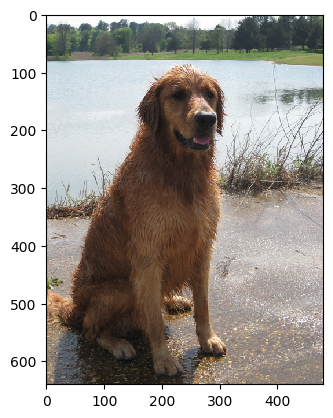

In [60]:
import matplotlib.pyplot as plt
image = plt.imread("dogImages/test/076.Golden_retriever/Golden_retriever_05220.jpg")
plt.imshow(image)
plt.show()

In [61]:
import requests
from PIL import Image
import io
import torchvision.transforms as T

path = ("dogImages/test/076.Golden_retriever/Golden_retriever_05220.jpg")
pil_img = Image.open(path)

# transforms
preprocess = T.Compose([
   T.Resize(256),
   T.CenterCrop(224),
   T.ToTensor(),
   T.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
   )
])

image = preprocess(pil_img).unsqueeze(0)
image.shape

torch.Size([1, 3, 224, 224])

In [62]:
response = predictor.predict(image)

In [63]:
print(response)

[[ -9.6468935   -3.50059581  -4.47388935  -7.00041533  -7.24861097
   -9.34273338  -6.0630126   -8.48416042  -6.24129057  -4.46097755
   -6.08333874  -4.84384775  -1.95814037  -6.00904322  -8.76117706
  -10.06722927  -8.10689163  -6.25178719  -7.34459543  -6.46506643
   -7.22888184  -6.46967697  -5.93454599 -11.16007996  -6.8131156
   -5.12246561  -5.17619133  -9.99515915  -3.86721659  -4.90079927
   -2.52173924 -10.35091496  -6.97225809 -10.55573654  -1.99573803
   -4.98665237  -7.05409527  -2.98910332  -9.06009197 -10.22146511
   -7.92668009  -5.92603588  -5.13088083  -6.60594749  -6.77804518
   -5.6264205   -3.32563019  -9.89666748  -9.96291637  -7.51320219
   -4.92081738  -7.30126905  -6.44969606  -4.84970617  -4.04996204
   -1.0740459   -8.85736942  -8.90396023  -7.51640177  -5.86822844
   -3.07624507  -3.67577124  -7.63574076  -6.0310812   -6.53222132
   -3.74681211  -2.21900415  -0.92644703 -11.16816235  -4.94253302
   -2.94976783  -7.68461561  -2.65701127  -5.71851492  -2.78362

In [64]:
my_array = np.array(response)
label = np.argmax(my_array, axis=1)
print("Dog breed label is {}".format(label+1)) 

Dog breed label is [76]


In [65]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pytorch-inference-2023-02-22-05-36-24-465
INFO:sagemaker:Deleting endpoint with name: pytorch-inference-2023-02-22-05-36-24-465
